# AI / DA -Projekti TTC8070-3001 

## Ryhmä 2 




## Tehtävä 1 b: Liiketoimintavaatimukset

Aurinkopaneelit ja vihreät arvot ovat kuuma puheenaihe tänäpäivänä ja aurinkopaneeleiden myynti ja tuotanto ovat olleet viimeaikona nousussa. Analysoimalla viime vuosikymmenien dataa voidaan ennustaa tulevaisuuden myyntiä ja varautua kysyntään paremmin. Aurinkopaneeli aineistoa voidaan hyödyntää esimerkiksi yrityksen asiakkaille tehtäviin kustannusarviointeihin ja voidaan tarjota asiakkailla myös työkalu, jolla asiakas voi tehdä henkilökohtaisen kustannusarvion oman kiinteistön tiedoilla. Datasetistä voidaan myös etsiä eroja asiakkaiden käyttäytymisessä eri osavaltioden välillä ja tehdä malli, jota voidaan skaalata toimimaan myös muissa osavaltioissa. 

Asiakkaan tietoa voidaan ja myös pitää hyödyntää esimerkiksi datan sarakkeiden selittämiseen, koska tällä hetkellä useat sarakkeet näennäisesti muistuttavat toisiaan, mutta sisältävät vaihtelevasti eri arvoja. Asiakkaiden liiketoiminna tuntemusta tulee myös kuunnella, koska siitä saa lisää ymmärrystä datasetin tulkitsemiseen ja myös parempaa ymmärrystä aurinkopaneeleista ja niiden käyttö kohteista.
Asiakas haluaa maksimoida tuotot, tehostaa liiketoimintamallia ja myös mahdollisesti löytää datasta ennalta tuntemattomia asioita/trendejä, joita voisi mahdollisesti hyödyntää liiketoiminnan kehityksessä.


- Projektin vaatimukset tällähetkellä:
    - Datan visualisointi:
        - Tehtävänanto
        - Yleisin asennettujen järjestelmien koko eri vuosina. Tähän liittyen tulisi selvittää hinta ja järjestelmäkoko kuluttaja- ja yritysasiakkaiden osalta asennusvuosittain (ts. millaisia järjestelmiä kunakin vuonna on asennettu näille asiakastyypeille)?
        - Asennettujen järjestelmien hintakehitys vuosien varrella?
        - Minkä kokoisia inverttereitä ajetaan ylikuormalla?
        - Yritys- ja kuluttaja-asiakkaiden osuudet osavaltioittain tai kaupungeittain?
        - Kuinka pitkään paneelivalmistajat ja asennusfirmat ovat toimineet alalla?
        - Optio: Näistä lisäksi myyntimäärät ja myyntimäärien kehitys vuosien saatossa.
        - Millä aurinkopaneelijärjestelmillä on paras hinta-teho-suhde?
        - Optio: Kaupunkien ryhmittely suuremmiksi alueiksi (kuitenkin pienemmät alueet kuin osavaltiot) (vinkki: Rest APIn hyödyntäminen).



## Tehtävä 2: Datan visualisointi


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/LBNL_file.csv', low_memory=False)

df = data.replace([-9999, '-9999', -9999.0], np.nan)



In [2]:
df2 = df.copy()
df2['installation_year'] = pd.to_datetime(df['installation_date']).dt.year
df2['price_per_kw'] = df['total_installed_price'] / df['system_size_DC']

### Aurinkopaneelijärjestelmien koko- ja hintakehitys vuosittain
Aurinkopaneelien koko on kasvanut aikavälillä huomattavasti 1999-2019. Varsinkin kaupalliseen tarkoitukseen tarkoitetut järjestelmät ovat kasvaneet merkittävästi. Järjestelmien hinta on vastaavasti myös tippunut samalla kun järjestelmien koko on kasvanut. 
#### Yritysasiakkaat (commercial)


<AxesSubplot:title={'center':'Kaupallisten järjestelmien keskikoko'}, xlabel='Vuosi', ylabel='Järjestelmän keskikoko (kW)'>

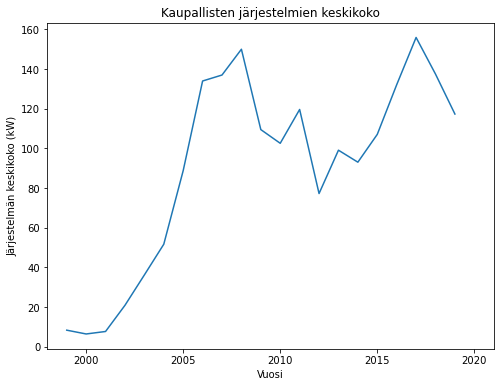

In [3]:

com = df2[df2['customer_segment'] == 'COM']

com2 = pd.DataFrame()
com2['average_system_size'] = com['system_size_DC'].groupby(df2['installation_year']).mean()
com2['average_system_price'] = com['total_installed_price'].groupby(df2['installation_year']).mean()
com2['average_price_per_kw'] = com['price_per_kw'].groupby(df2['installation_year']).mean()
com2.reset_index()

com2.plot(
    y='average_system_size', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskikoko (kW)', 
    title='Kaupallisten järjestelmien keskikoko', 
    use_index=True, 
    figsize=(8,6), 
    legend=False,
    xlim=(1998,2021)
)


<AxesSubplot:title={'center':'Kaupallisten järjestelmien keskihinta'}, xlabel='Vuosi', ylabel='Järjestelmän keskihinta ($/kW)'>

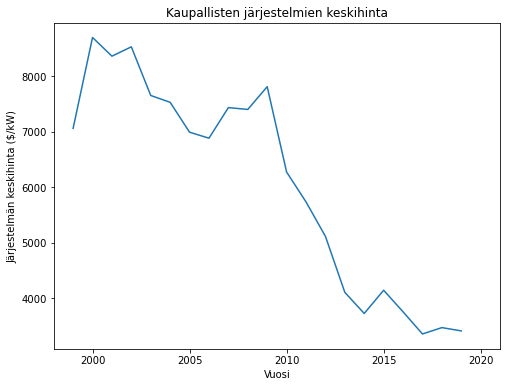

In [4]:
com2.plot(
    y='average_price_per_kw', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskihinta ($/kW)', 
    title='Kaupallisten järjestelmien keskihinta',  
    figsize=(8,6),
    use_index=True,
    legend=False,
    xlim=(1998,2021)
)



#### Kuluttajat (Residential)

<AxesSubplot:title={'center':'Kuluttaja-asiakkaiden järjestelmien keskikoko'}, xlabel='Vuosi', ylabel='Järjestelmän keskikoko (kW)'>

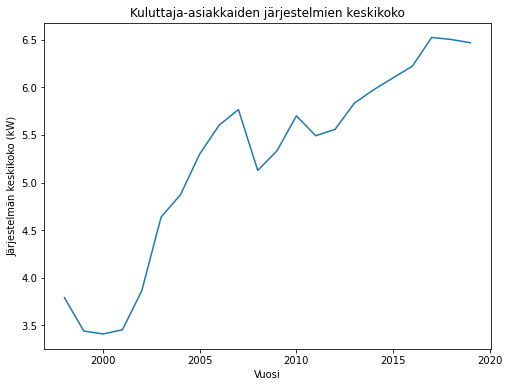

In [5]:
res = df2[df2['customer_segment'] == 'RES']

res2 = pd.DataFrame()
res2['average_system_size'] = res['system_size_DC'].groupby(df2['installation_year']).mean()
res2['average_system_price'] = res['total_installed_price'].groupby(df2['installation_year']).mean()
res2['average_price_per_kw'] = res['price_per_kw'].groupby(df2['installation_year']).mean()
res2.reset_index()

res2.plot(y='average_system_size', 
          kind='line', 
          xlabel='Vuosi', 
          ylabel='Järjestelmän keskikoko (kW)', 
          title='Kuluttaja-asiakkaiden järjestelmien keskikoko', 
          use_index=True, 
          figsize=(8,6), 
          legend=False)


<AxesSubplot:title={'center':'Kuluttaja-asiakkaiden järjestelmien keskihinta $/kW'}, xlabel='Vuosi', ylabel='Järjestelmän keskihinta ($/kW)'>

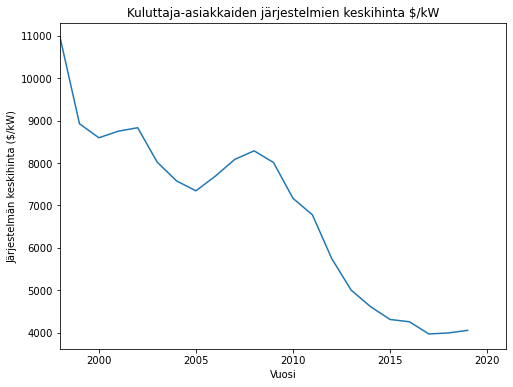

In [6]:
res2.plot(
    y='average_price_per_kw', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskihinta ($/kW)', 
    title='Kuluttaja-asiakkaiden järjestelmien keskihinta $/kW',  
    figsize=(8,6), 
    legend=False,
    xlim=(1998,2021)
)


### Minkä kokoisia inverttereitä ajetaan ylikuormalla?

Näyttäisi siltä, että kaikenkokoisia inverttereitä voidaan ajaa ylikuormalla. Kaaviossa on punaisella ne järjestelmät, joissa invertterin ja järjestelmän tehon suhde (load ratio) on yli 1 

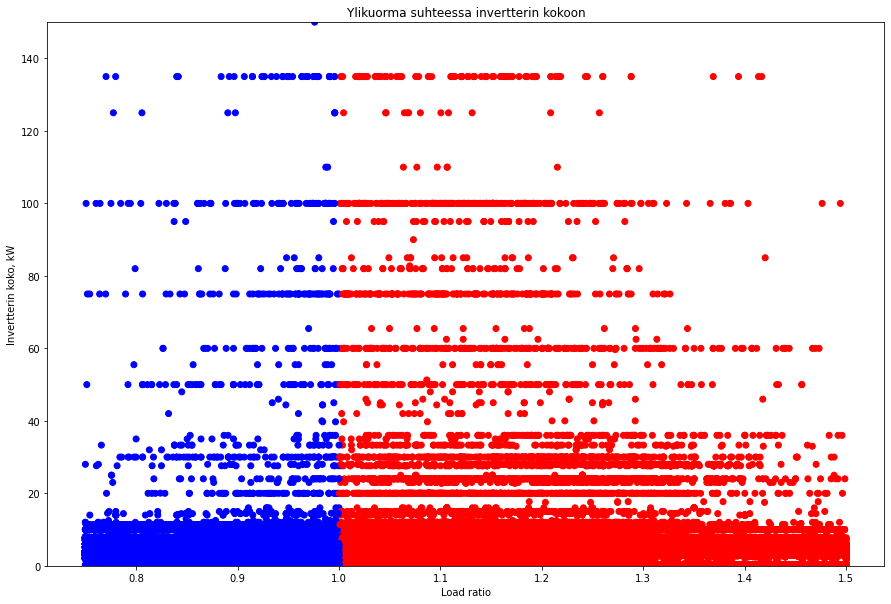

In [7]:


y=df2['output_capacity_inverter_1']
x=df2['inverter_loading_ratio']

col = np.where(x>1, 'r', 'b')

plt.figure(figsize=(15,10))
plt.scatter(x, y, c=col)

plt.title("Ylikuorma suhteessa invertterin kokoon")
plt.xlabel('Load ratio')
plt.ylabel('Invertterin koko, kW')
plt.ylim(0,150)
plt.show()